In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler

%matplotlib inline

In [45]:
plt.rcdefaults()
plt.rcParams.update({
  'patch.linewidth': 0.5,
  'patch.facecolor': '#e37e00',
  'patch.edgecolor': '#EEEEEE',
  'patch.antialiased': True,
  'font.size': 10.0,
  'font.family': 'Khmer Sangam MN',
  'axes.facecolor': 'white',
  'axes.edgecolor': 'white',
  'axes.linewidth': '1',
  'axes.grid': True,
  'grid.linewidth': '1',
  'legend.scatterpoints': '2',
  'axes.titlesize': 'large',
  'axes.labelsize': 'large',
  'axes.labelcolor': '#555555',
  'axes.axisbelow': True,
  'axes.prop_cycle': cycler('color', ['#C10534', '#ffd200', '#e37e00', '#00887d', '#7ad2f6', '#014d64', '#938DD2']),
  'xtick.major.bottom': True,
  'xtick.minor.bottom': True,
  'xtick.major.size': 7,
  'xtick.major.pad': 2,
  'xtick.direction': 'in',
  'xtick.labelsize': 'medium',
  'ytick.left': True,
  'ytick.labelsize': 'large',
  'grid.color': '#d9e6eb',
  'grid.linestyle': '-',
  'figure.facecolor': 'white'
})

In [3]:
df = pd.read_excel("CPD gang database 11-17.xlsx")
df.head()

,AGE,RACE,GANG_NAME,FACTION_NAME,BEAT_FIRST_ARREST,FIRST_ARREST
0,19.0,BLACK,12TH STREET PLAYERS,NaN,NaN,2016-01-01
1,20.0,WHITE,12TH STREET PLAYERS,NaN,NaN,2010-08-01
2,21.0,WHITE HISPANIC,12TH STREET PLAYERS,NaN,NaN,2012-11-01
3,22.0,WHITE HISPANIC,12TH STREET PLAYERS,NaN,NaN,2010-11-01
4,22.0,WHITE HISPANIC,12TH STREET PLAYERS,NaN,NaN,2008-08-01


In [4]:
from matplotlib.ticker import FuncFormatter

def with_commas(value, pos):
    return "{:,}".format(int(value))

formatter = FuncFormatter(with_commas)

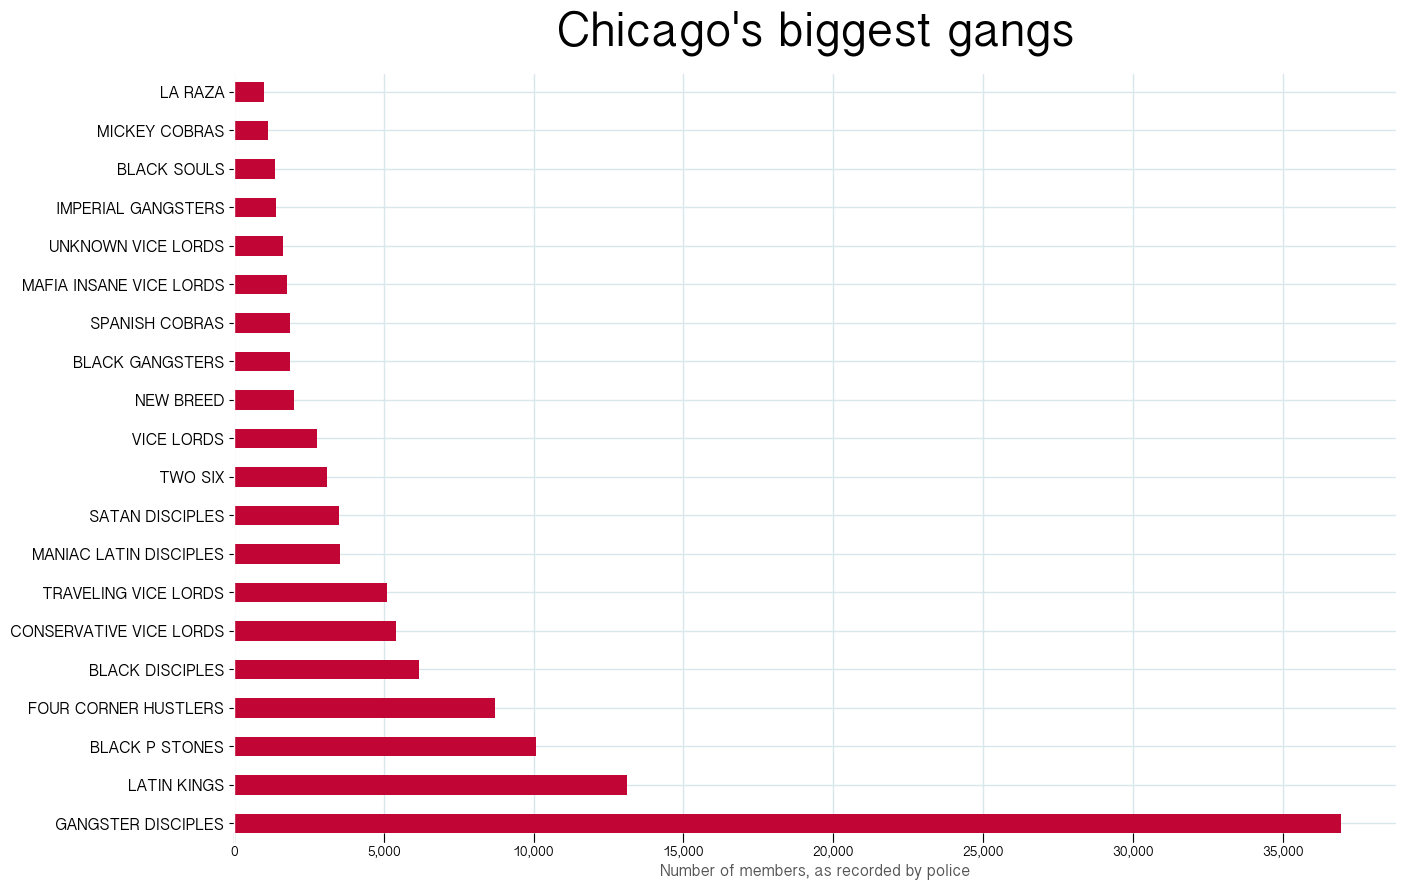

In [5]:
color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]
ax = df.GANG_NAME.value_counts().head(20).plot(kind='barh', color=color, figsize=(15,10))

# ax.grid(False, axis='x')

ax.xaxis.set_major_formatter(formatter)

ax.set_title("Chicago's biggest gangs", fontweight='bold', pad=20)
ax.title.set_fontsize(35)
ax.title.set_fontname("Khmer Sangam MN")

ax.set_xlabel("Number of members, as recorded by police")
# ax.set_ylabel("")

plt.show()

In [22]:
# df.GANG_NAME.value_counts().head(10)
top_ten_list = ['GANGSTER DISCIPLES', 'LATIN KINGS', 'BLACK P STONES', 'FOUR CORNER HUSTLERS', 'BLACK DISCIPLES', 'CONSERVATIVE VICE LORDS', 'TRAVELING VICE LORDS', 'MANIAC LATIN DISCIPLES','SATAN DISCIPLES', 'TWO SIX']

In [24]:
top_ten = df[df.GANG_NAME.isin(top_ten_list)]
top_ten.GANG_NAME.value_counts()

GANGSTER DISCIPLES         36943
LATIN KINGS                13116
BLACK P STONES             10086
FOUR CORNER HUSTLERS        8700
BLACK DISCIPLES             6174
CONSERVATIVE VICE LORDS     5423
TRAVELING VICE LORDS        5123
MANIAC LATIN DISCIPLES      3555
SATAN DISCIPLES             3494
TWO SIX                     3118
Name: GANG_NAME, dtype: int64

In [25]:
top_ten.head()

,AGE,RACE,GANG_NAME,FACTION_NAME,BEAT_FIRST_ARREST,FIRST_ARREST
1573,18.0,BLACK,BLACK DISCIPLES,YOUNG MONEY / TYMB(003),321.0,2010-02-01
1574,18.0,BLACK,BLACK DISCIPLES,82ND AND MARYLAND (BRAIN DEAD),212.0,2014-04-01
1575,18.0,BLACK,BLACK DISCIPLES,NaN,726.0,2011-11-01
1576,18.0,BLACK,BLACK DISCIPLES,NaN,312.0,2013-07-01
1577,18.0,BLACK,BLACK DISCIPLES,ADA PARK,2234.0,2013-07-01


In [32]:
# .unstack() turns a series object thingy into a dataframe
# .reset_index() give it a new index
race_df = top_ten.groupby('GANG_NAME')['RACE'].value_counts().unstack().reset_index().fillna(0)
race_df

RACE,GANG_NAME,AMER IND/ALASKAN NATIVE,ASIAN/PACIFIC ISLANDER,BLACK,BLACK HISPANIC,UNKNOWN,WHITE,WHITE HISPANIC
0,BLACK DISCIPLES,1.0,4.0,6144.0,10.0,0.0,8.0,6.0
1,BLACK P STONES,2.0,14.0,9964.0,19.0,4.0,38.0,45.0
2,CONSERVATIVE VICE LORDS,1.0,8.0,5335.0,14.0,0.0,26.0,38.0
3,FOUR CORNER HUSTLERS,0.0,7.0,8535.0,16.0,0.0,37.0,105.0
4,GANGSTER DISCIPLES,3.0,29.0,36277.0,59.0,4.0,226.0,343.0
5,LATIN KINGS,19.0,62.0,820.0,233.0,34.0,1352.0,10595.0
6,MANIAC LATIN DISCIPLES,2.0,9.0,392.0,106.0,4.0,350.0,2691.0
7,SATAN DISCIPLES,4.0,5.0,211.0,37.0,5.0,522.0,2709.0
8,TRAVELING VICE LORDS,0.0,4.0,5075.0,12.0,1.0,7.0,24.0
9,TWO SIX,1.0,8.0,67.0,21.0,5.0,401.0,2615.0


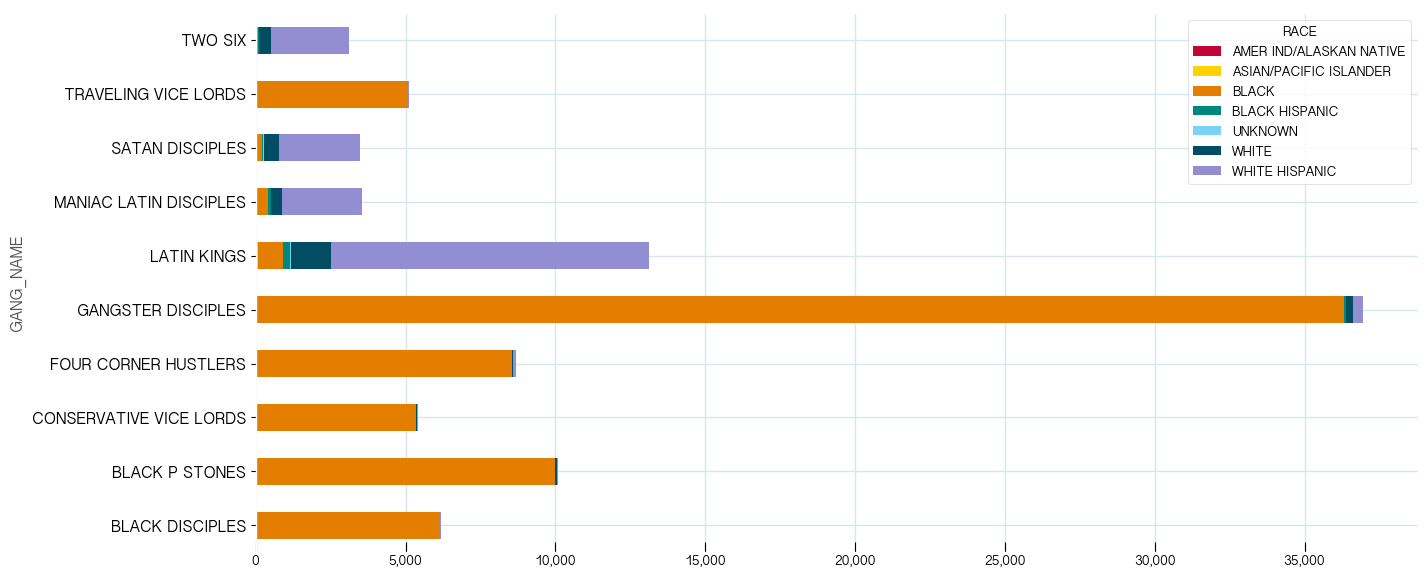

In [46]:
ax = race_df.plot(kind='barh', x='GANG_NAME', stacked=True, figsize=(15,7))

ax.xaxis.set_major_formatter(formatter)

plt.show()

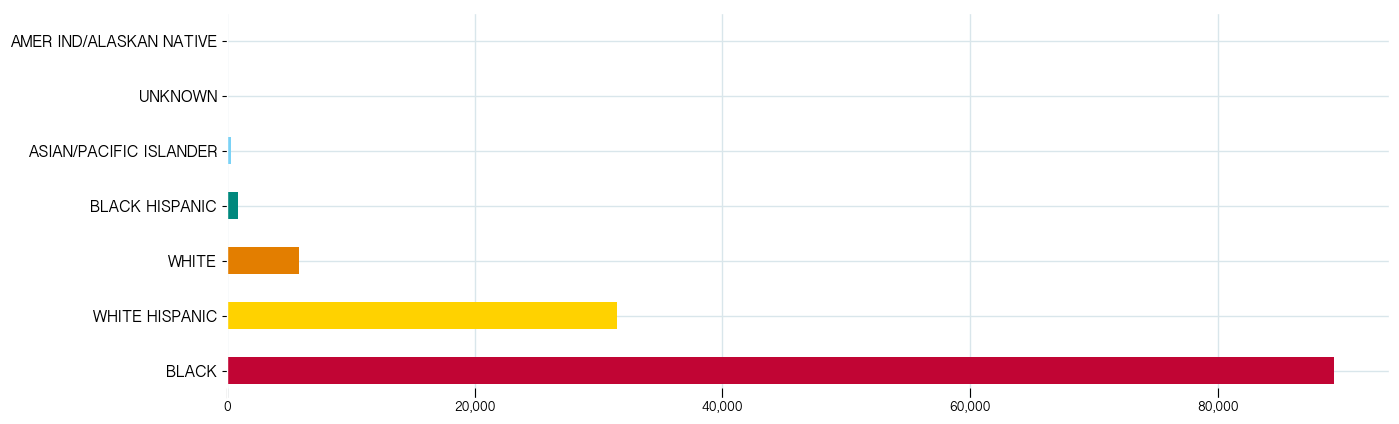

In [63]:
ax = df.RACE.value_counts().plot(kind='barh', figsize=(15,5))
ax.xaxis.set_major_formatter(formatter)
plt.show()

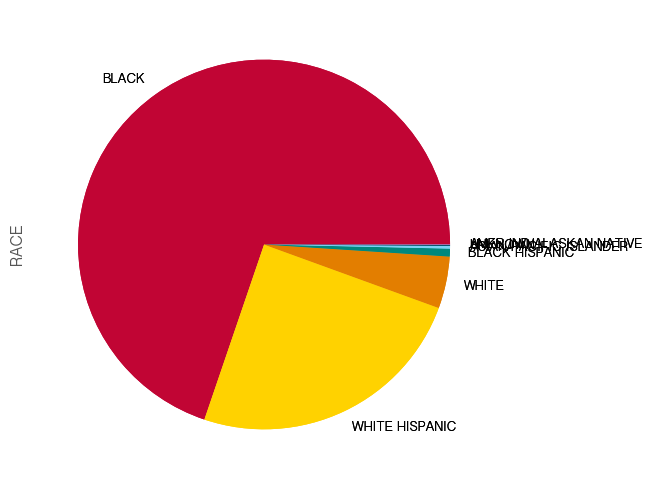

In [58]:
# ax = df.RACE.value_counts().plot(kind='barh')
# ax.xaxis.set_major_formatter(formatter)
# plt.show()

series = df.RACE.value_counts()

# series.plot.pie(figsize=(6, 6)) *THIS IS FROM pandas documentation

series.plot.pie(figsize=(6, 6))
plt.show()

In [6]:
df.dtypes

AGE                         float64
RACE                         object
GANG_NAME                    object
FACTION_NAME                 object
BEAT_FIRST_ARREST           float64
FIRST_ARREST         datetime64[ns]
dtype: object

In [7]:
df.sort_values(by='FIRST_ARREST', ascending=False)

,AGE,RACE,GANG_NAME,FACTION_NAME,BEAT_FIRST_ARREST,FIRST_ARREST
107915,46.0,WHITE HISPANIC,SATAN DISCIPLES,NaN,1034.0,2017-10-01
104636,18.0,WHITE HISPANIC,SATAN DISCIPLES,NaN,111.0,2017-10-01
28129,20.0,BLACK,FOUR CORNER HUSTLERS,JACK BOYS,2532.0,2017-10-01
122672,18.0,BLACK,VICE LORDS,NaN,1131.0,2017-10-01
78770,28.0,WHITE,LATIN COUNTS,NaN,1021.0,2017-10-01
22085,19.0,BLACK,CONSERVATIVE VICE LORDS,WABANSIA & LUNA,2531.0,2017-10-01
80738,21.0,WHITE HISPANIC,LATIN KINGS,NaN,NaN,2017-10-01
96884,25.0,WHITE HISPANIC,MANIAC LATIN DISCIPLES,NaN,NaN,2017-10-01
9635,18.0,BLACK,BLACK P STONES,NaN,312.0,2017-10-01
37179,19.0,BLACK,GANGSTER DISCIPLES,NaN,NaN,2017-10-01


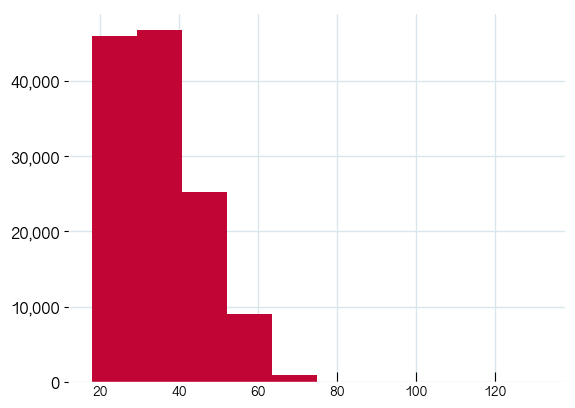

In [48]:
ax = df.AGE.hist()

ax.yaxis.set_major_formatter(formatter)

plt.show()

In [12]:
df[df.AGE > 80].AGE.value_counts()

117.0    17
81.0      2
132.0     1
82.0      1
84.0      1
131.0     1
83.0      1
Name: AGE, dtype: int64

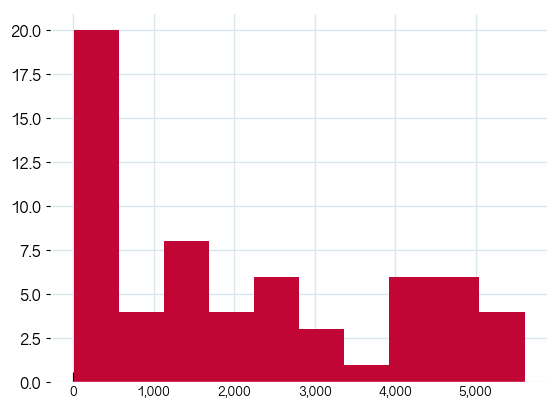

In [50]:
# df[df.AGE > 80].AGE.value_counts().plot(kind='bar')
# plt.show()

ax = df[df.AGE < 80].AGE.value_counts().hist()
ax.xaxis.set_major_formatter(formatter)
plt.show()